# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [61]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

In [63]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [65]:
y, X = patsy.dmatrices('tip ~ sex + smoker + C(time) + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  C(time)[T.Dinner]  net_bill
          1              1             1                  1     15.98
          1              0             1                  1      8.68
          1              0             1                  1     17.51
          1              0             1                  1     20.37
          1              1             1                  1     20.98
          1              0             1                  1     20.58
          1              0             1                  1      6.77
          1              0             1                  1     23.76
          1              0             1                  1     13.08
          1              0             1                  1     11.55
          1              0             1                  1      8.56
          1              1             1                  1     30.26
          1              0             1                 

In [67]:
reg = smf.ols('tip ~ sex + smoker + C(time) + net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           2.64e-20
Time:                        17:28:53   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]        -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]          0.1405      0.151      0.932      0.352      -0.156       0.437
C(time)[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill              0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

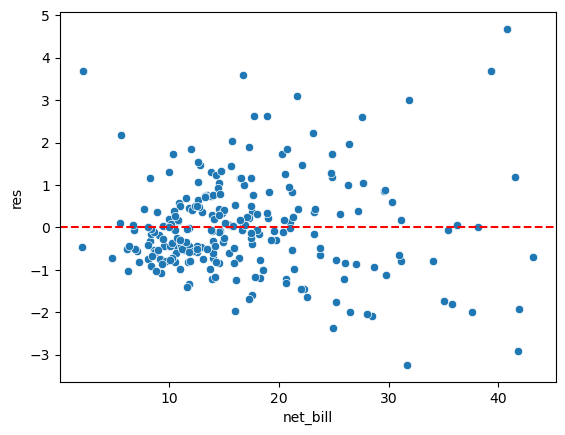

In [69]:
tips['res'] = reg.resid

sns.scatterplot(x='net_bill',y='res',data=tips)
plt.axhline(y=0,color='r',linestyle='--')

<Axes: xlabel='sex', ylabel='res'>

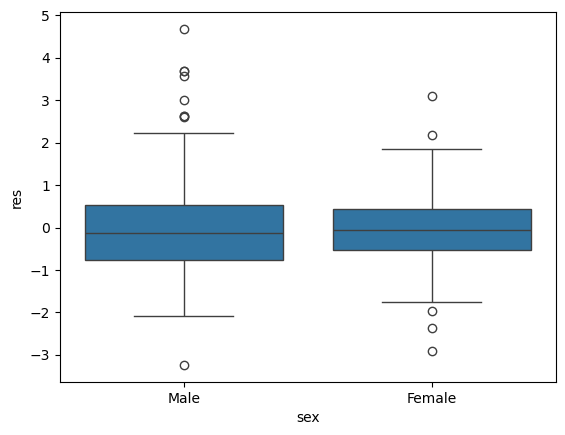

In [71]:
sns.boxplot(x='sex',y='res',data=tips)

<Axes: xlabel='smoker', ylabel='res'>

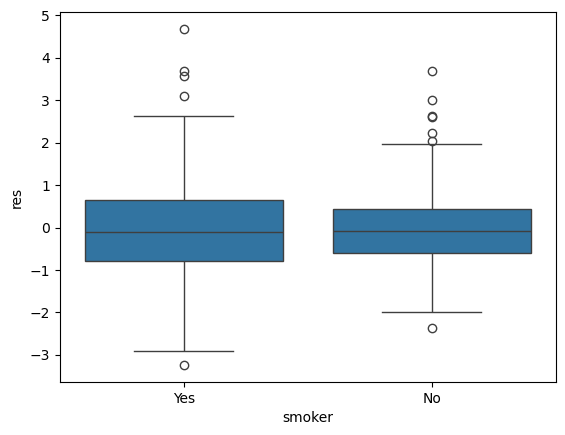

In [73]:
sns.boxplot(x='smoker',y='res',data=tips)

<Axes: xlabel='time', ylabel='res'>

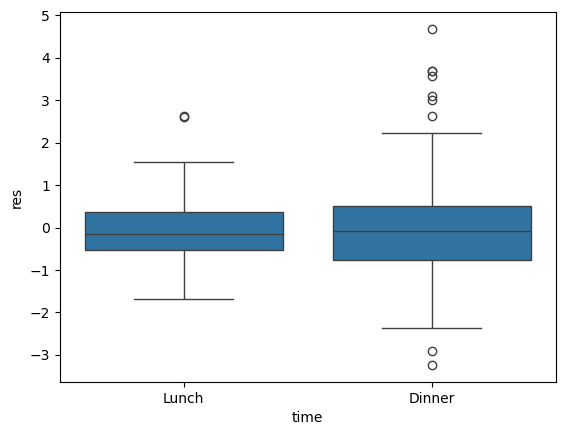

In [75]:
sns.boxplot(x='time',y='res',data=tips)

In [77]:
reg = smf.ols('tip ~ smoker + net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           4.56e-22
Time:                        17:28:57   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
reg = smf.ols('tip ~ smoker + np.log(net_bill)', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           5.38e-19
Time:                        17:28:58   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

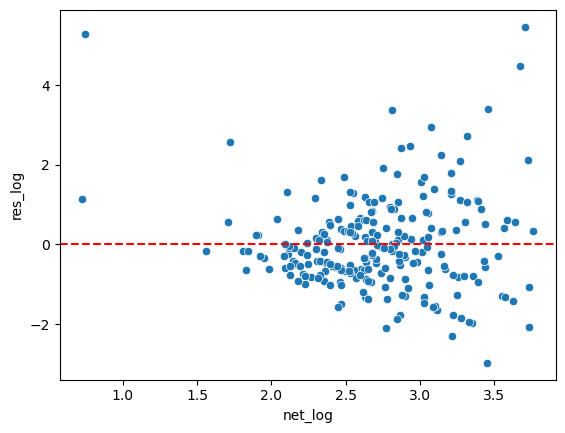

In [81]:
tips['net_log'] = np.log(tips['net_bill'])
tips['res_log'] = reg.resid

sns.scatterplot(x='net_log',y='res_log',data=tips)
plt.axhline(y=0,color='r',linestyle='--')

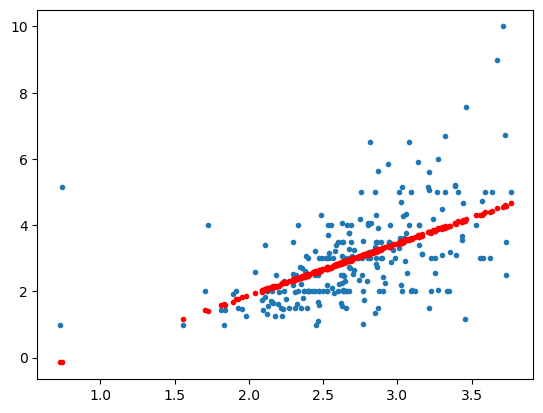

In [85]:
tips['pred_log'] = reg.fittedvalues

plt.plot(tips['net_log'],tips['tip'],'.')
plt.plot(tips['net_log'],tips['pred_log'],'r.')

In [87]:
reg = smf.ols('tip ~ smoker + net_bill + np.power(net_bill,2)', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     40.55
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           3.11e-21
Time:                        17:29:37   Log-Likelihood:                -374.93
No. Observations:                 244   AIC:                             757.9
Df Residuals:                     240   BIC:                             771.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0129      0.361      2.804      0.005       0.301       1.724
smoker[T.No]              0.1263      0.151      0.836      0.404      -0.171       0.424
net_bill                  0.1262      0.037      3.408      0.001       0.053       0.199
np.power(net_bill, 2)    -0.0006      0.001     -0.727      0.468      -0.002       0.001
==============================================================================
Omnibus:                       42.091   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.282
Skew:                           0.872   Prob(JB):                     8.23e-19
Kurtosis:                       5.270   Cond. No.                     2.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

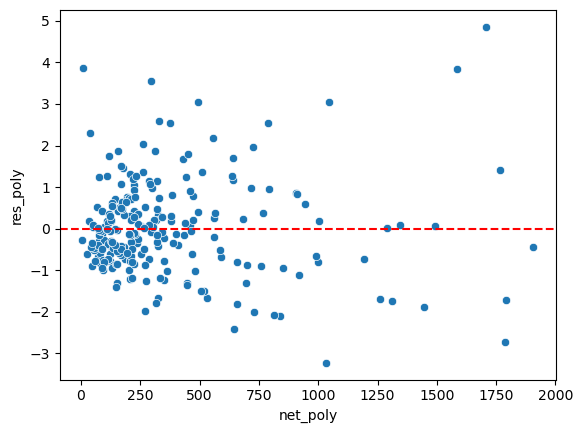

In [89]:
tips['net_poly'] = tips['net_bill'] + np.power(tips['net_bill'],2)
tips['res_poly'] = reg.resid

sns.scatterplot(x='net_poly',y='res_poly',data=tips)
plt.axhline(y=0,color='r',linestyle='--')

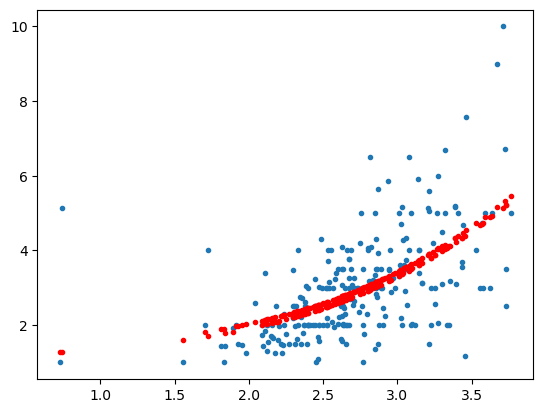

In [91]:
tips['pred_poli'] = reg.fittedvalues

plt.plot(tips['net_log'],tips['tip'],'.')
plt.plot(tips['net_log'],tips['pred_poli'],'r.')

Considerando o R-squared maior para o modelo polinomial e o ajuste visual em que os valores ajustados seguem a tendencia aproximada da distribuicao dos dados, o modelo que melhor se ajusta eh este.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

A atividade foi realizada por completo no item anterior.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [97]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [101]:
y, X = patsy.dmatrices('renda ~ tempo_emprego', df)
X

DesignMatrix with shape (12466, 2)
  Intercept  tempo_emprego
          1        3.57534
          1        0.86027
          1        8.06575
          1        1.20822
          1       13.87397
          1       15.56164
          1        5.04658
          1        1.59178
          1        3.43014
          1        7.21918
          1        5.63836
          1        4.47945
          1       16.52877
          1        7.93425
          1        5.54247
          1        5.35890
          1        6.93425
          1        4.00822
          1       10.63562
          1        2.68219
          1       14.95890
          1        1.52055
          1        1.76164
          1        2.43288
          1        3.48767
          1       19.96712
          1        7.17808
          1        0.34795
          1        9.55342
          1       18.38904
  [12436 rows omitted]
  Terms:
    'Intercept' (column 0)
    'tempo_emprego' (column 1)
  (to view full data, use np.asarray(t

In [103]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:39:01   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

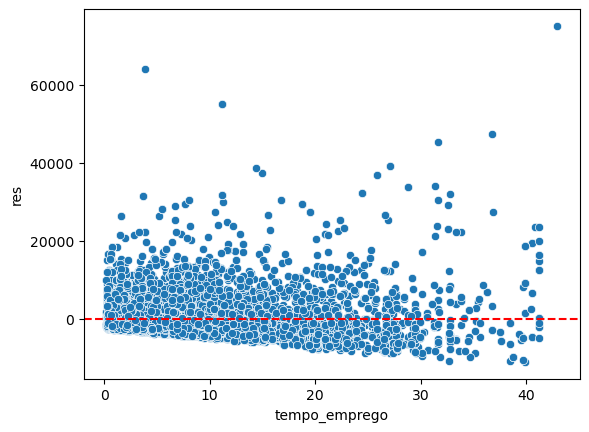

In [107]:
df['res'] = reg.resid

sns.scatterplot(x='tempo_emprego',y='res',data=df)
plt.axhline(y=0,color='r',linestyle='--')

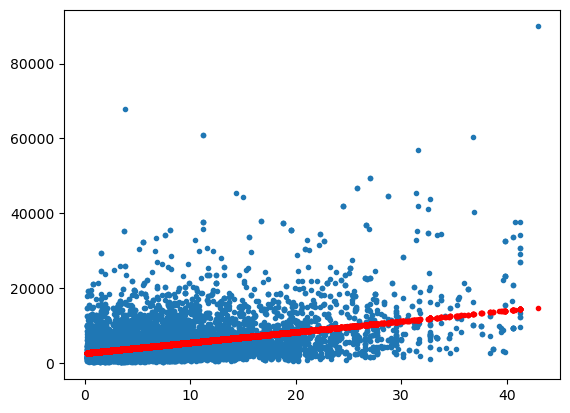

In [113]:
df['pred_temp'] = reg.fittedvalues

plt.plot(df['tempo_emprego'],df['renda'],'.')
plt.plot(df['tempo_emprego'],df['pred_temp'],'r.')

In [121]:
reg = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego,2)', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:45:54   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3407.0877     81.730     41.687      0.000    3246.885    3567.291
tempo_emprego                 87.0286     15.488      5.619      0.000      56.669     117.388
np.power(tempo_emprego, 2)     7.2469      0.529     13.699      0.000       6.210       8.284
==============================================================================
Omnibus:                     9723.560   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           345767.284
Skew:                           3.454   Prob(JB):                         0.00
Kurtosis:                      27.859   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

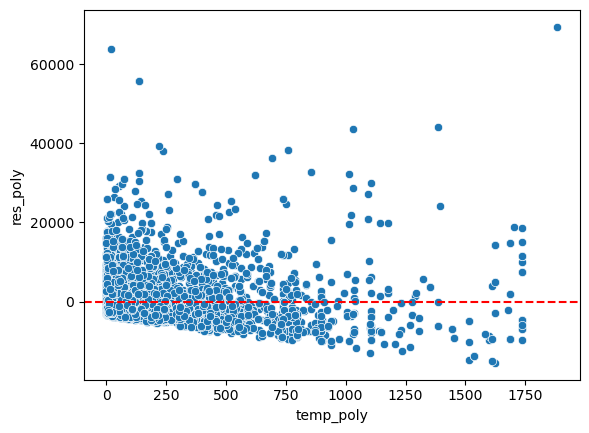

In [125]:
df['temp_poly'] = df['tempo_emprego'] + np.power(df['tempo_emprego'],2)
df['res_poly'] = reg.resid

sns.scatterplot(x='temp_poly',y='res_poly',data=df)
plt.axhline(y=0,color='r',linestyle='--')

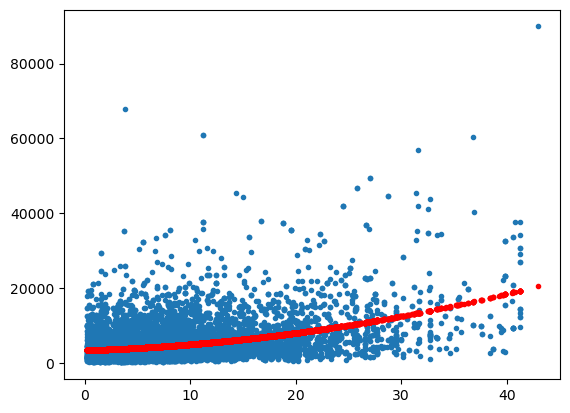

In [129]:
df['pred_poly'] = reg.fittedvalues

plt.plot(df['tempo_emprego'],df['renda'],'.')
plt.plot(df['tempo_emprego'],df['pred_poly'],'r.')

Considerando o coeficiente de determinacao que aumenta ao ajustarmos tempo_emprego como uma funcao polinomial de segundo grau, o melhor ajuste eh observado utilizando esta abordagem.

In [134]:
y, X = patsy.dmatrices('renda ~ C(data_ref) + index + C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia + renda', df)
X

DesignMatrix with shape (12466, 41)
  Columns:
    ['Intercept',
     'C(data_ref)[T.2015-02-01]',
     'C(data_ref)[T.2015-03-01]',
     'C(data_ref)[T.2015-04-01]',
     'C(data_ref)[T.2015-05-01]',
     'C(data_ref)[T.2015-06-01]',
     'C(data_ref)[T.2015-07-01]',
     'C(data_ref)[T.2015-08-01]',
     'C(data_ref)[T.2015-09-01]',
     'C(data_ref)[T.2015-10-01]',
     'C(data_ref)[T.2015-11-01]',
     'C(data_ref)[T.2015-12-01]',
     'C(data_ref)[T.2016-01-01]',
     'C(data_ref)[T.2016-02-01]',
     'C(data_ref)[T.2016-03-01]',
     'C(sexo)[T.M]',
     'C(posse_de_veiculo)[T.True]',
     'C(posse_de_imovel)[T.True]',
     'C(tipo_renda)[T.Bolsista]',
     'C(tipo_renda)[T.Empresário]',
     'C(tipo_renda)[T.Pensionista]',
     'C(tipo_renda)[T.Servidor público]',
     'C(educacao)[T.Pós graduação]',
     'C(educacao)[T.Secundário]',
     'C(educacao)[T.Superior completo]',
     'C(educacao)[T.Superior incompleto]',
     'C(estado_civil)[T.Separado]',
     'C(estado_civil)[T.Sol

In [196]:
reg = smf.ols('renda ~ C(data_ref) + C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     93.15
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:08:47   Log-Likelihood:            -1.2198e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12427   BIC:                         2.443e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            -175.9772   1681.684     -0.105      0.917   -3472.338    3120.384
C(data_ref)[T.2015-02-01]              28.7651    211.101      0.136      0.892    -385.025     442.555
C(data_ref)[T.2015-03-01]              34.1453    210.891      0.162      0.871    -379.235     447.525
C(data_ref)[T.2015-04-01]             -50.8117    211.445     -0.240      0.810    -465.277     363.654
C(data_ref)[T.2015-05-01]            -157.5041    209.700     -0.751      0.453    -568.548     253.540
C(data_ref)[T.2015-06-01]               7.6887    211.727      0.036      0.971    -407.328     422.706
C(data_ref)[T.2015-07-01]             -92.5812    211.929     -0.437      0.662    -507.994     322.832
C(data_ref)[T.2015-08-01]            -230.0417    212.156     -1.084      0.278    -645.901     185.818
C(data_ref)[T.2015-09-01]            -258.7976    211.238     -1.225      0.221    -672.857     155.261
C(data_ref)[T.2015-10-01]              20.4430    210.687      0.097      0.923    -392.537     433.423
C(data_ref)[T.2015-11-01]            -166.3136    210.825     -0.789      0.430    -579.563     246.936
C(data_ref)[T.2015-12-01]            -374.8101    211.087     -1.776      0.076    -788.573      38.953
C(data_ref)[T.2016-01-01]            -256.5930    210.770     -1.217      0.223    -669.734     156.548
C(data_ref)[T.2016-02-01]              88.1340    210.891      0.418      0.676    -325.246     501.514
C(data_ref)[T.2016-03-01]             120.4681    211.088      0.571      0.568    -293.298     534.234
C(sexo)[T.M]                         2363.2309     88.149     26.809      0.000    2190.445    2536.017
C(posse_de_veiculo)[T.True]           -80.3301     84.783     -0.947      0.343    -246.518      85.858
C(posse_de_imovel)[T.True]            349.7623     83.471      4.190      0.000     186.146     513.379
C(tipo_renda)[T.Bolsista]            -842.1685   2157.076     -0.390      0.696   -5070.372    3386.035
C(tipo_renda)[T.Empresário]          1022.0630     90.188     11.333      0.000     845.280    1198.846
C(tipo_renda)[T.Pensionista]         1783.1316   1438.365      1.240      0.215   -1036.286    4602.549
C(tipo_renda)[T.Servidor público]     430.1624    130.659      3.292      0.001     174.051     686.274
C(educacao)[T.Pós graduação]         2166.8052   1081.744      2.003      0.045      46.419    4287.191
C(educacao)[T.Secundário]            -251.4484    437.960     -0.574      0.566   -1109.918     607.021
C(educacao)[T.Superior completo]      341.5684    439.867      0.777      0.437    -520.640    1203.777
C(educacao)[T.Superior incompleto]   -305.9705    471.111     -0.649      0.516   -1229.422     617.481
C(estado_civil)[T.Separado]           147.6323    806.818      0.18

In [176]:
reg = smf.ols('renda ~ C(sexo) + C(posse_de_imovel) + C(tipo_residencia) + idade + tempo_emprego', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     363.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:04:32   Log-Likelihood:            -1.2209e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12456   BIC:                         2.443e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             852.3570    371.352      2.295      0.022     124.450    1580.264
C(sexo)[T.M]                         2297.5125     82.648     27.799      0.000    2135.510    2459.515
C(posse_de_imovel)[T.True]            383.5090     83.727      4.580      0.000     219.391     547.627
C(tipo_residencia)[T.Casa]           -296.1446    330.637     -0.896      0.370    -944.244     351.955
C(tipo_residencia)[T.Com os pais]    -626.8800    370.954     -1.690      0.091   -1354.007     100.247
C(tipo_residencia)[T.Comunitário]    -559.9586    637.341     -0.879      0.380   -1809.246     689.329
C(tipo_residencia)[T.Estúdio]        -695.2383    549.673     -1.265      0.206   -1772.683     382.206
C(tipo_residencia)[T.Governamental]  -873.1263    399.785     -2.184      0.029   -1656.767     -89.486
idade                                  23.5036      4.480      5.246      0.000      14.722      32.285
tempo_emprego                         296.3032      6.102     48.561      0.000     284.343     308.263
==============================================================================
Omnibus:                    10139.331   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           439425.382
Skew:                           3.612   Prob(JB):                         0.00
Kurtosis:                      31.175   Cond. No.                         958.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

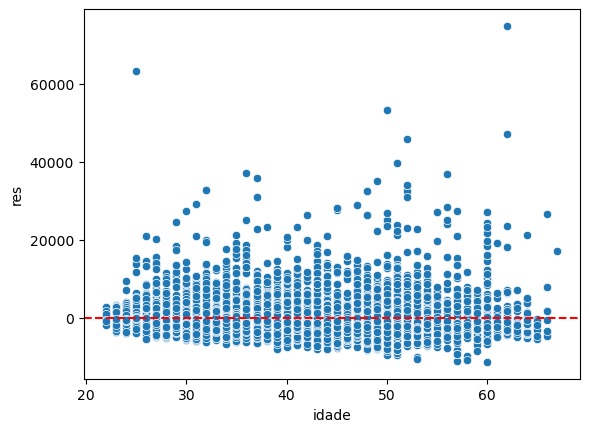

In [180]:
df['res'] = reg.resid

sns.scatterplot(x='idade',y='res',data=df)
plt.axhline(y=0,color='r',linestyle='--')

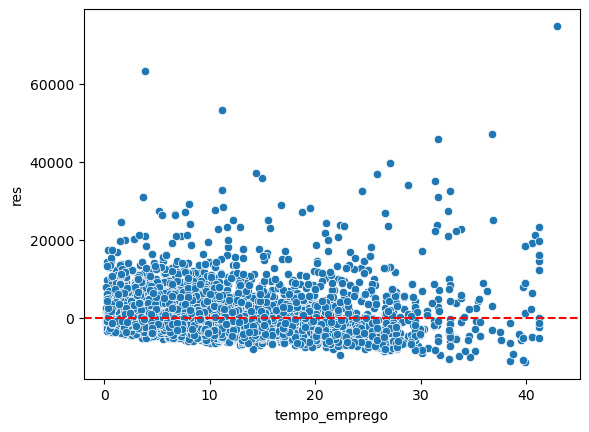

In [182]:
df['res'] = reg.resid

sns.scatterplot(x='tempo_emprego',y='res',data=df)
plt.axhline(y=0,color='r',linestyle='--')

<Axes: xlabel='sexo', ylabel='res'>

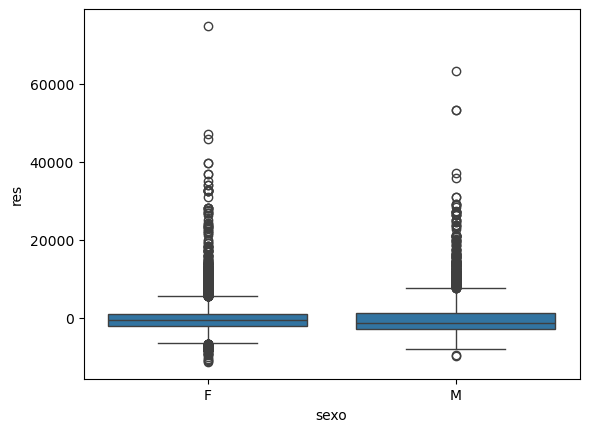

In [186]:
sns.boxplot(x='sexo',y='res',data=df)

<Axes: xlabel='posse_de_imovel', ylabel='res'>

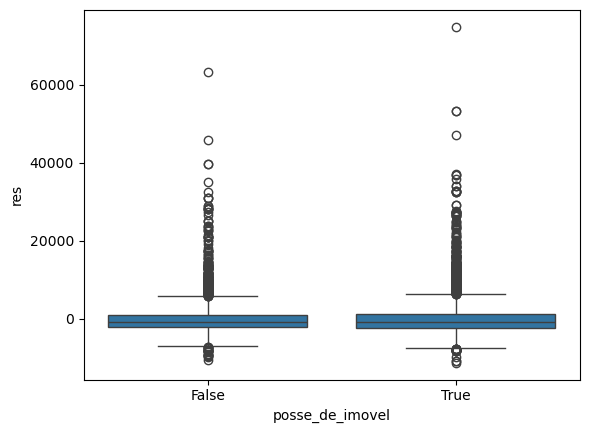

In [192]:
sns.boxplot(x='posse_de_imovel',y='res',data=df)

<Axes: xlabel='tipo_residencia', ylabel='res'>

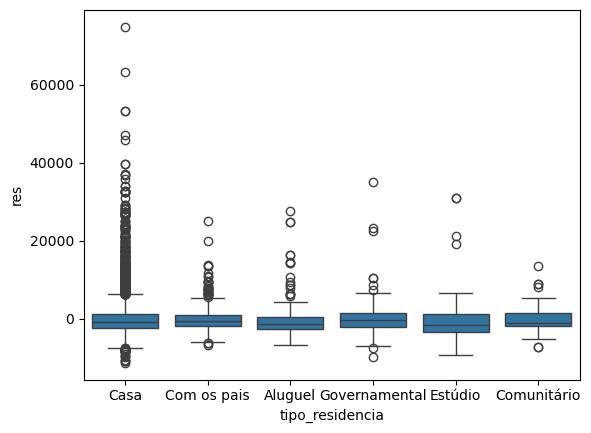

In [194]:
sns.boxplot(x='tipo_residencia',y='res',data=df)

Embora removidas as variaveis com P > |t| maiores que 0.500, o ajuste piorou em relacao ao ajuste que considera a presenca de todas as variaveis.